## <center> Legal case report summarization </center>

### Introduction

Summarization is a very broad topic and it have application in different areas from customer relationship to health care and legal domain. In this research, the focus will be on legal case report summarization.

Summarization is the process of conveying or extracting only relevant information or facts by removing irrelevant information. Summarization can be done manually as well as using technology available. Manual summarization is normally done by the people who are expert in that domain

There is huge amount of textual data available in the world and huge amount of textual data generated each day by different systems. This information includes documents, articles, text messages etc. People’s need to read and comprehend the large text content in less time becoming more significant day by day. There are speed reading techniques exist but from the reader to hone those skills it requires huge amount of dedication.

In this fast-moving world, the amount of time needs to be invested to understand a case report for a legal professional or public is high. By summarization the case using the technology available to us, we can reduce the gap between the awareness of public and legal profession.

This is not the only problem; large number of cases exist in government public databases. It is very hard to go through it manually and summarize reports. The cost, manpower and time required to summarized report manually is considerably large.

Text summarization will help in finding important information from a large text document with small amount of time and very less effort. There are multiple summarization techniques exist, this includes abstract and extract summarization. Abstract summarizations understand the context to summarize the text data, it is summarization of the original data which is paraphrase and not exactly taken from input data. Extract summarizations extract relevant phrases and sentence from the document then form the summary. This thesis deals with the development of text summarization of legal case report using extract summarization technique.


### 

## Table of content:
* [Required python Libraries](#first-bullet)
* [Exploratory Data Analysis](#second-bullet)
* [Pre-processing](#third-bullet)
* [Processing](#forth-bullet)
* [post-Processing](#fifth-bullet)
* [Evaluation result](#sixth-bullet)
* [Conclusion](#seventh-bullet)

### Required python Libraries <a class="anchor" id="first-bullet"></a>

In [1]:
# Import required library

import re
import os
import time
import tqdm
import pandas as pd 
import numpy as np
from tqdm import tqdm
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from spacy import displacy
import statistics
from collections import Counter
import en_core_web_sm
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


### Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

In [38]:
# Read file from the repository

# Repository to pick files
RawDirectory = "C:\\Users\\abalarajthankakumari\\Downloads\\Thesis\\Code\\corpus\\corpus\\fulltext\\"

# List all the file from the directory
RawDatafiles = os.listdir(RawDirectory)

In [39]:
# Reusable function to clean the raw for exploratory data analysis.

def cleanData(text):
    data = []
    text = text.read().strip().replace('\n', '')
    ##print(text)
    sentences = re.findall(r'<sentence .*?>(.*?)</sentence>+', text)
    name = re.findall(r'<name>(.*?)</name>+', text)
    data.append([name, sentences])
    text = ''
    data = []
    data.append(name)
        
    for sent in sentences:
        if(len(sent) > 10):
            data.append(sent)
            text += sent + '\n'
    return text

In [40]:
CombineData  = pd.DataFrame(columns=['raw'])
for file in RawDatafiles:
    rawData = open(RawDirectory + file, "r")
    cleanRawData = cleanData(rawData)
    #CombineData  = pd.DataFrame(np.column_stack([cleanRawData]))
    CombineData = CombineData.append({'raw':cleanRawData}, ignore_index=True)

In [41]:
# Header rows

CombineData.head(5)

raw
0   Background to the current application  1 The ...
1    1 These are two applications for orders of r...
2    1 I have before me two notices of motion bot...
3    Introduction  1 In 1985 Mr Fletcher Brand se...
4   Context to the present application by way of ...

In [42]:
# Tail rows

CombineData.tail(5)

raw
3885   This is an application for an extension of ti...
3886   INTRODUCTION  This is an appeal from orders m...
3887   Mr Kazimir Kowalski has brought a proceeding ...
3888   One of the principal determinative issues in ...
3889   ISSUE  The issue for determination, the subje...

In [43]:
# shape of the data

CombineData.shape

(3890, 1)

In [44]:
# Information

CombineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   raw     3890 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB


<AxesSubplot:>

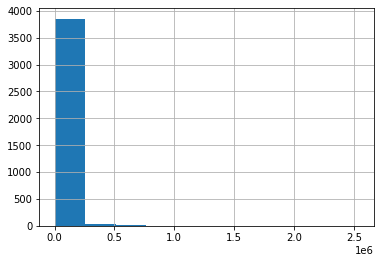

In [45]:
# Number of characters present in each sentence.

CombineData['raw'].str.len().hist()

<AxesSubplot:>

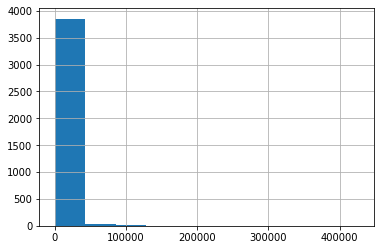

In [46]:
# Number of words  present

CombineData['raw'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot:>

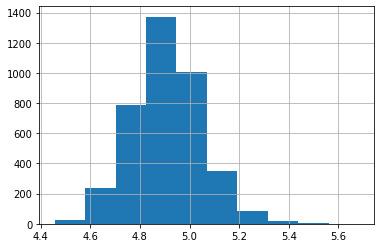

In [47]:
# Average word length

CombineData['raw'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [48]:
#Loading stop words from nltk library

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abalarajthankakumari\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Number of stop words present in the dataset

corpus=[]
combdata= CombineData['raw'].str.split()
combdata=combdata.values.tolist()
corpus=[word for i in combdata for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

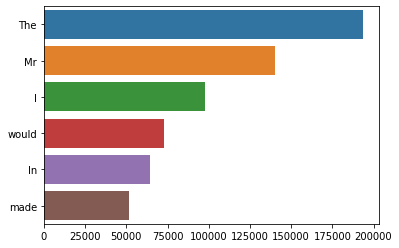

In [50]:
# Number of non-stop words present.

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [51]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

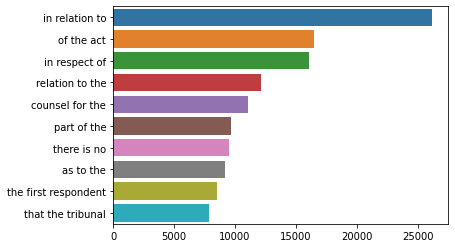

In [52]:
# Most frequent n-grams

top_tri_grams=get_top_ngram(CombineData['raw'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [26]:
# Summarize function

def summarization(file_path, output_dir, coefficients, sentence_num, chrologically, keyphrases):
    print('###################################')
    print('Summarization process begin.')
    print('###################################')
    processed_df = NER(file_path)
    calculate_tfidf_scores(processed_df)
    summary = append_finale_score(processed_df, coefficients, sentence_num, chrologically, keyphrases)
    
    print('###################################')
    print('Summarization process stopped.')
    print('###################################')
    
    return summary
    

In [27]:
# Funciton to find Name entity recognition

def NER(file_path):
    print('###################################')
    print('Name entity recognition started.')
    print('###################################')
    dataframe = preprocessing(file_path)
    processed_df = processing(dataframe)
    print('###################################')
    print("Name entity recognition completed")
    print('###################################')
    return processed_df

### Preprocessing  <a class="anchor" id="third-bullet"></a>

In [28]:
def preprocessing(file_path):
    print('###################################')
    print('Preprocessing started.')
    print('###################################')
    
    data = []
    text = ""

    # Read file from the directory
    with open(file_path, 'r') as f:
        text = f.read()
    f.closed
    
    # Cleaning the xml data.
    if(file_path.endswith('.xml')):
        text=text.strip().replace('\n', '')
        sentences = re.findall(r'<sentence .*?>(.*?)</sentence>+', text)
    
        name = re.findall(r'<name>(.*?)</name>+', text)[0]
    
        data.append([name,sentences])
    
        text = ""
        data = []
        data.append(name)
    
        for sent in sentences:
            if(len(sent) > 10):
                data.append(sent)
            text += sent + "\n"
        
    df = pd.DataFrame(data, columns = ['Value'])
    print('###################################')
    print('Preprocessing.')
    print('###################################')
    return df

### Processing  <a class="anchor" id="forth-bullet"></a>

In [29]:
def processing(dataframe):
    print('###################################')
    print('Processing started.')
    print('###################################')
    validator = {'SCORE':0, 'SUM':0, 'TFIDF_SCORE':0, 'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0,'SENTENCE_LENGTH':0,'SENTENCE':''}
    document = []
    cnt = 1
    
    for i in range(1, len(dataframe)):
        sentence = dataframe.iloc[i].Value
        nlp_sentence = nlp(sentence)
        keys = {'SCORE':0, 'SUM':0, 'TFIDF_SCORE':0, 'PERSON':0,'NORP':0,'FAC':0,'ORG':0,'GPE':0,'LOC':0,'PRODUCT':0,'EVENT':0,'WORK_OF_ART':0,'LAW':0,'LANGUAGE':0,'DATE':0,'TIME':0,'PERCENT':0,'MONEY':0,'QUANTITY':0,'ORDINAL':0,'CARDINAL':0,'SENTENCE_LENGTH':0,'SENTENCE':''}
        cnt = Counter([x.label_ for x in nlp_sentence.ents])
        for k in cnt.keys():
            keys[k] = cnt[k]
        if validator != keys:
            keys['SENTENCE'] = sentence
            suma = 0
            for k in keys.keys():
                if(k != 'SENTENCE'):
                    suma += keys[k]
            keys['SUM'] = suma
            document.append(keys)

    processed_df = pd.DataFrame(document, columns = ['SCORE','SUM','TFIDF_SCORE','PERSON','NORP','FAC','ORG','GPE','LOC','PRODUCT','EVENT','WORK_OF_ART','LAW','LANGUAGE','DATE','TIME','PERCENT','MONEY','QUANTITY','ORDINAL','CARDINAL','SENTENCE_LENGTH','SENTENCE'])
    print('###################################')
    print('processing.')
    print('###################################')
    return processed_df

In [30]:
def stem_sentence(sentence, stemmer):
    words = nltk.word_tokenize(sentence)
    stemmed_sentence = ''

    for word in words:
        stemmed_sentence += stemmer.stem(word) + ' '

    return stemmed_sentence

### Post-Processing <a class="anchor" id="fifth-bullet"></a>

In [31]:
def calculate_tfidf_scores(dataframe):        
    # stemming
    sentences = dataframe['SENTENCE']
    stemmed_sentences = []
    stemmer = PorterStemmer()
    for sentence in sentences:
        stemmed_sentences.append(stem_sentence(sentence, stemmer))

    # Removing stop words
    stopwords = nltk.corpus.stopwords.words('english')
    
    # tf-idf score for each sentence
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    text_vector = vectorizer.fit_transform(stemmed_sentences)
    
    sentence_lengths = []
    sentence_scores = []
    for row in text_vector:
        sentence_length = row.getnnz()            
        if sentence_length == 0:
            sentence_length = 1
        sentence_lengths.append(sentence_length)
        sentence_scores.append(np.sum(row))
    
    # create new column in dataframe with tf-idf scores for each sentence
    dataframe['SENTENCE_LENGTH'] = sentence_lengths      
    dataframe['TFIDF_SCORE'] = sentence_scores
    
    print('###################################')
    print('calculated TF-IDF score.')
    print('###################################')

In [32]:
def calculate_score(keyphrases, sentence, tfidf_score, sentence_length, dates_num, person, norp, org, money, gpe, law, work_of_art, st_dev, coefficients):
    phrase_score = 0
    sentence = sentence.lower()
    if any(phrase in sentence for phrase in keyphrases):
        phrase_score = 1
    
    max_date = 0.4
    max_person = 0.4
    max_entity = 0.5
    max_phrases = 1
    date_coef = coefficients[0] * max_date
    people_coef = coefficients[1] * max_person
    entity_coef = coefficients[2] * max_entity
    phrases_coef = coefficients[3] * max_phrases
    
    normalized_tfidf = tfidf_score / sentence_length
    peoples_num = person + work_of_art
    entities_num = norp + org + money + gpe + law + person + work_of_art
    
    return normalized_tfidf + st_dev * (date_coef * dates_num + people_coef * peoples_num + entity_coef * entities_num + phrases_coef * phrase_score)

In [33]:
def append_finale_score(dataframe, coefficients, sentence_num, chrologically, keyphrases):        
    st_dev = statistics.stdev(dataframe['TFIDF_SCORE'])
    dataframe['SCORE'] = dataframe.apply(lambda row: calculate_score(keyphrases, row['SENTENCE'], row['TFIDF_SCORE'], row['SENTENCE_LENGTH'], row['DATE'], row['PERSON'], row['NORP'], row['ORG'], row['MONEY'], row['GPE'], row['LAW'], row['WORK_OF_ART'], st_dev, coefficients), axis=1)
    original_sentences = get_raw_sentences(dataframe)
    #print(original_sentences)
    dataframe.sort_values('SCORE', inplace=True, ascending=False)
    
    if(sentence_num > len(dataframe)):
        sentence_num = dataframe - 1
        
    #print('\n\n'.join(dataframe['SENTENCE'][0:sentence_num]))
    print(dataframe['SCORE'])
    summary = []
    if(chrologically):
        for i in range(0, len(original_sentences)):                
           
            if original_sentences.loc[i, 'SENTENCE'] in list(dataframe['SENTENCE'])[0:sentence_num]:
                print(original_sentences.loc[i, 'SCORE'])
                pair = (original_sentences.loc[i, 'SENTENCE'], original_sentences.loc[i, 'SCORE'])
                summary.append(pair)
    else:
        for sentence, score in zip(dataframe['SENTENCE'][0:sentence_num], dataframe['SCORE'][0:sentence_num]):               
            pair = (sentence, score)
            summary.append(pair)

    print('###################################')
    print('Calculating the score.')
    print('###################################')
    return summary

In [34]:
def get_raw_sentences(dataframe):     
    return dataframe[['SENTENCE', 'SCORE']]

In [35]:


def theMainFuntion(file):
    # importance of different factor.
    coefficients = (1, 1, 1, 1)

    # Number of sentence in output summary.
    sentence_num = 3 * 3
    keyphrases = ""
    # Input file and output directory
    file_path = "corpus//fulltext//" + file

    # Summary function        
    summary_pairs = summarization(file_path, file_path, coefficients, sentence_num, True, keyphrases)
    summary = [pair[0] for pair in summary_pairs]
    scores = [pair[1] for pair in summary_pairs]
    #print(scores)
    #max_score = max(scores)
    #min_score = min(scores)
    #colors = ['blue', 'yellow', 'orange', 'red']
    #step = (max_score - min_score) / (len(colors) - 1)
            
    print('\n\n'.join(summary))

    sum_final = '\n\n'.join(summary)

    return sum_final

#print(sum_final)

In [36]:
def summfile(file):

    file = "corpus//citations_summ//"+file
    summData = open(file, "r")
    from bs4 import BeautifulSoup

    soup = BeautifulSoup(summData, 'xml')
    sentences = soup.find_all('sentence')

    gold_sentences = []
    for sentence in sentences:
        text = sentence.text
        text = text.strip()
        text = text.strip('.')
        text = text.lstrip('0123456789.- ')
        text = re.sub(r'(( [\d])$)|(.*>)|(\n)','',text)
        text = text.strip()
        gold_sentences.append(text)

    print(gold_sentences)
    # Function to convert  
    def listToString(s): 
        
        # initialize an empty string
        str1 = " " 
        
        # return string  
        return (str1.join(s))
            
            
    # Driver code    
    evalData = listToString(gold_sentences)
    print(evalData)
    return(evalData)


In [37]:
RawDirectory = "C:\\Users\\abalarajthankakumari\\Downloads\\Thesis\\Code\\corpus\\corpus\\fulltext\\"
RawData = os.listdir(RawDirectory)

from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

CombineData  = pd.DataFrame(columns=['sum','eval','score','1Precison','1Recall','1fmeasure','LPrecison', 'LRecall','Lfmeasure'])
Error = pd.DataFrame(columns=['error'])

for sen in RawData:
    try:
        sum_final = theMainFuntion(sen)
        evalData = summfile(sen)
    except:
        print("There was an exception. File name : " + sen)
        Error = Error.append({'error': sen }, ignore_index=True)



    scores = scorer.score(sum_final,evalData)

    CombineData = CombineData.append({'sum':sum_final,'eval':evalData,'score': scores, '1Precison': scores['rouge1'][0], '1Recall': scores['rouge1'][1], '1fmeasure': scores['rouge1'][2], 'LPrecison': scores['rougeL'][0], 'LRecall': scores['rougeL'][1], 'Lfmeasure': scores['rougeL'][2], 'File' : sen  }, ignore_index=True)
  

    

###################################
Summarization process begin.
###################################
###################################
Name entity recognition started.
###################################
###################################
Preprocessing started.
###################################
###################################
Preprocessing.
###################################
###################################
Processing started.
###################################
###################################
processing.
###################################
###################################
Name entity recognition completed
###################################
###################################
calculated TF-IDF score.
###################################
26    2.719418
1     2.462244
30    2.259100
9     2.100995
23    2.007327
10    1.666141
14    1.638519
25    1.579135
29    1.538873
20    1.311759
3     1.203122
6     1.185579
13    1.183933
4     1.167038
8     1.160075
21    1.

### Evaluation result <a class="anchor" id="sixth-bullet"></a>

In [38]:
# Average precision for ROGUE1

CombineData["1Precison"].mean()

0.568895490214664

In [39]:
# Average Recall for ROGUE1

CombineData["1Recall"].mean()

0.3531728139000612

In [40]:
# Average fmeasure for ROGUE1

CombineData["1fmeasure"].mean()

0.4283189773594103

|ROGUE-1-Precision| ROGUE-1-Recall | ROGUE-1-F-Measure |
| :- | -: | :-: |
| 56 % | 35 % | 42 % |

In [41]:
# Average precision for ROGUEL

CombineData["LPrecison"].mean()

0.26464099459394663

In [42]:
# Average recall for ROGUEL

CombineData["LRecall"].mean()

0.16077131376285902

In [43]:
# Average fmeasure for ROGUEL

CombineData["Lfmeasure"].mean()

0.1963863236004322

|ROGUE-L-Precision| ROGUE-L-Recall | ROGUE-L-F-Measure |
| :- | -: | :-: |
| 26 % | 16 % | 19 % |

### Conclusion <a class="anchor" id="seventh-bullet"></a>

There are different summarization techniques available including the abstract and extract summarization. For the legal domain it is best suit to use extract summarization. The reason is, the case report has large amount of content and existing summarization technique are not best suited for it. Legal case report has fact-based information and translating them may leads to loss of vital information.

|ROGUE-1-Precision| ROGUE-1-Recall | ROGUE-1-F-Measure |ROGUE-L-Precision| ROGUE-L-Recall | ROGUE-L-F-Measure |
| :- | -: | :-: | :- | -: | :-: |
| 56 % | 35 % | 42 % | 26 % | 16 % | 19 % |

The legal summarization using the extract summarization techniques is giving good result.